# Linear Regression

## Introduction

Linear regression is perhaps one of the most simple and widely used algorithms in machine learning. 

Linear regression is used to find the mathematical equation that best explains the relationship between the response variable ($\mathbf{Y}$) and the predictors ($\mathbf{X}$).

The notation of linear model is 

<img src="Image/regression-equation.jpeg" alt="Drawing" style="width: 500px;"/>

Linear models have following assumptions:
- Linearity: the dependent variable Y should be linearly related to independent variables - view using a scatter plot

![image](https://editor.analyticsvidhya.com/uploads/96503linear-nonlinear-relationships.png)

- Normality: X and Y values follow the normal distribution - check with histograms, KDE plots, or Q-Q plots

![image](https://editor.analyticsvidhya.com/uploads/64526normality.png)

- Homoscedasticity: The spread of the residuals should be constant for all variables - use a residual plot (if the assumption is violated, points will form a funnel shape)

![image](https://editor.analyticsvidhya.com/uploads/51367residuals.png)

- Independence/No multicollinearity: there is no correlation between any of the independent variables - calculate a correlation matrix of VIF score (if VIF > 5, variables are highly correlated)

![image](https://editor.analyticsvidhya.com/uploads/99214correlation.png)

- Error terms are also normally distributed: plot histograms and Q-Q plots

![image](https://editor.analyticsvidhya.com/uploads/79532normality%20of%20error.png)

- No autocorrelation: error terms should be independent of each other - use Durbin-Watson test, where the null hypothesis assumes there is no autocorrelation

![image](https://editor.analyticsvidhya.com/uploads/38946DW.png)

There are also a few evaluation metrics for regression:
- $R^2$, aka the "coefficient of determination": the most common metric, is the ratio of variation to the total variation (equation below - SS_res is the residual sum of squares and SS_tot is the total sum of squares). The value will be between 0 and 1; the closer to 1, the better the model. However, as the number of features increases, the value of $R^2$ increases, giving the (sometimes false) illusion of a good model.

![image](https://editor.analyticsvidhya.com/uploads/74264r2.png)

- Adjusted $R^2$: improvement to $R^2$, only considers features important for the model and shows the real improvement. The equation is detailed below

![image](https://editor.analyticsvidhya.com/uploads/80741adjusted%20r2.png)

- Mean Squared Error (MSE)

![image](https://editor.analyticsvidhya.com/uploads/42113mse.jpg)

- Root Mean Squared Error (RMSE): root of the mean difference between actual and predicted values. It penalizes large errors

![image](https://editor.analyticsvidhya.com/uploads/69457rmse.png)


The above information was largely based on [this article](https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/), which can be referenced for further reading.


In machine learning, the objective of using linear regression is used to find the mathematical equation that best explains the relationship between the response variable (<img src="https://latex.codecogs.com/svg.image?\mathbf{Y}" title="\mathbf{Y}" />) and the predictors (<img src="https://latex.codecogs.com/svg.image?\mathbf{X}" title="\mathbf{X}" />). The matrix notation of the linear model is 

<img src="https://latex.codecogs.com/svg.image?\mathbf{Y}=\mathbf{X}\mathbf{\beta}&plus;\mathbf{\epsilon}" title="\mathbf{Y}=\mathbf{X}\mathbf{\beta}+\mathbf{\epsilon}" />, where <img src="https://latex.codecogs.com/svg.image?\beta" title="\beta" /> is unknown model parameter, and <img src="https://latex.codecogs.com/svg.image?\epsilon" title="\epsilon" /> is random error.

### Method of Least Squares

The model fitting with Least Squares aims to minimize the sum of squared errors (SSE). The estimate of <img src="https://latex.codecogs.com/svg.image?\mathbf{Y}" title="\mathbf{Y}" /> by this model is <img src="https://latex.codecogs.com/svg.image?\hat{Y}=&space;\mathbf{X}\hat{\beta}=\mathbf{X}\left(&space;\mathbf{X}^{T}\mathbf{X}&space;\right)^{-1}\mathbf{X}^{T}\mathbf{Y}" title="\hat{Y}= \mathbf{X}\hat{\beta}=\mathbf{X}\left( \mathbf{X}^{T}\mathbf{X} \right)^{-1}\mathbf{X}^{T}\mathbf{Y}" />.

The hat matrix is defined as <img src="https://latex.codecogs.com/svg.image?H=\mathbf{X}\left(&space;\mathbf{X}^{T}\mathbf{X}&space;\right)^{-1}\mathbf{X}^{T}" title="H=\mathbf{X}\left( \mathbf{X}^{T}\mathbf{X} \right)^{-1}\mathbf{X}^{T}" />, 
which is composed solely of the sample values of the predictor variables.


---
In this notebook, I will use [Car Price Assignment](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) data. We will write the linear regression algorithm and use it to model the price of a new car.



In [1]:
# Import the necessary libraries
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Part 1: 

To predict the prices of a new car model

#### Data exploration and wrangling

First, I extracted the Ethereum price from Yahoo Finance using pandas-datareader, and I set the start date as Jan 1, 2021 and the end date as Sep 7, 2021.

In [2]:
# Import Car Price Assignment data
pd.set_option('display.max_columns', None)
df = pd.read_csv('Datasets/CarPrice_Assignment.csv')

To explore the data:

In [3]:
df.head()
# df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape
# df.size

(205, 26)

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

<AxesSubplot:>

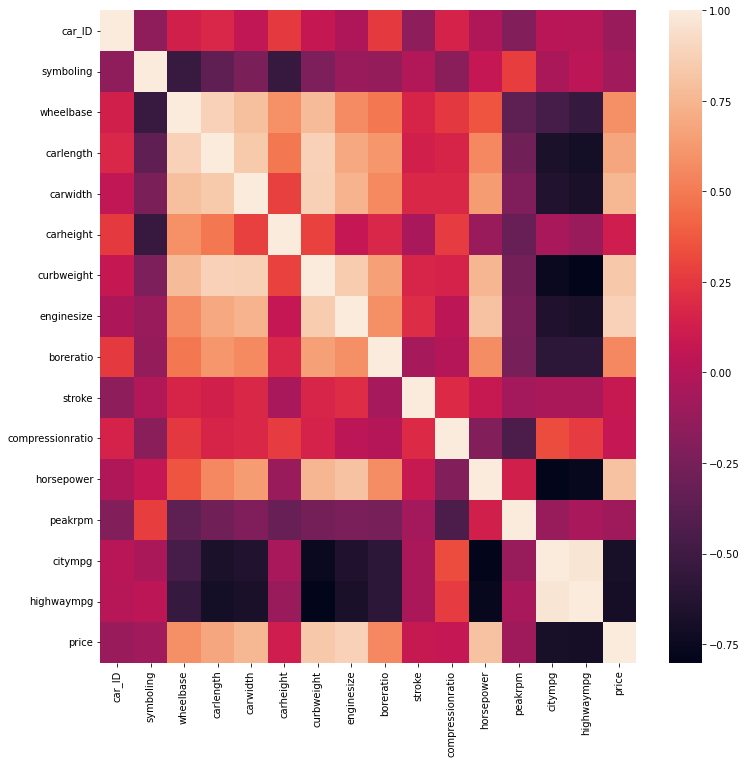

In [10]:
correlation = df.corr()
plt.figure(figsize = (12 , 12))
sns.heatmap(correlation)

## Build the model

In [11]:
#Create a function to find the slope of the regression line
def Slope(a,b):
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    slope = (n * dot_sum - sumX * sumY)/(n * sumX2 - sumX**2)
    return slope

In [12]:
#Create a function to find the intercept of the linear regression line
def Intercept(a,b):
    intercept = np.mean(b) - Slope(a,b) * np.mean(a)
    return intercept

In [13]:
#Create a function to make predictions using the linear regression algorithm
def Prediction(slope, x_input, intercept):
    predict = slope * x_input + intercept
    return predict

In [14]:
#Create a function to find R-squared, which is the regression metric
def R_squared(predicted_values, test_values):
    f = predicted_values
    y = test_values
    sum_sq = np.sum((y - np.mean(y))**2) #equation for sum of squares
    sum_reg = np.sum((f - np.mean(y))**2) #equation for regression sum
    sum_res = np.sum((y - f)**2) #equation for residuals sum of squares
    R_2 = 1 - (sum_res/sum_sq) #equation for R-squared
    return R_2    

In [15]:
#Create a function to find the correlation coefficient for given x and y values
def Correlation_coeff(predicted_values, test_values):
    a = predicted_values
    b = test_values
    n = len(a)
    dot_sum = np.sum(a*b)
    sumX = np.sum(a)
    sumY = np.sum(b)
    sumX2 = np.sum(a**2)
    sumY2 = np.sum(b**2)
    score = (n *dot_sum - sumX * sumY) / np.sqrt((n * sumX2 - (sumX)**2)*(n * sumY2 - (sumY)**2))
    return score

In [16]:
#Create a function to find the covariance for given x and y values
def Covariance(X,Y):
    a = X
    b = Y
    n = len(a)
    dot_sum = np.sum(a*b)
    cov = dot_sum / n - np.mean(a) * np.mean(b)
    return cov

## Pre-Processing

In [17]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [18]:
#Setting which variables will be compared in the regression
X = df.enginesize
y = df.price.values

# Implementation
We will now utilize the functions created above to evaluate the imported dataset For [CarPriceAssignment](https://github.com/ppunia74/INDE-577_Fall2022/blob/main/SupervisedLearning/Linear%20Regression/Datasets/CarPrice_Assignment.csv) specifically, there are lots of variables on which one could run a regression.

Splitting the dataset into the Training set and Test set

In [19]:
#Divide the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)


In [20]:
#Find the intercept of the training regression line using the functions created previously
intercept = Intercept(X_train,y_train)
slope = Slope(X_train,y_train)

predictions = Prediction(slope = slope,x_input = X_test, intercept = intercept)

print("R-squared:", R_squared(predicted_values = predictions, test_values = y_test))
print("Correlation Coefficient:", Correlation_coeff(test_values = y_test, predicted_values = predictions))

R-squared: 0.7825324721447274
Correlation Coefficient: 0.8882197793295487


In [21]:
#Equation of the regression line
y_est = slope * X + intercept

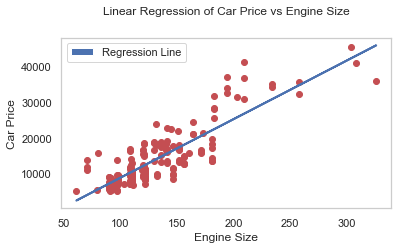

In [24]:
#Plot the linear regression function
plt.scatter(X,y, c='r')
plt.plot(X,y_est, color = 'b',linewidth=2)
blue_patch = mpatches.Patch(label='Regression Line')
plt.legend(loc=0,handles=[blue_patch])
plt.title('Linear Regression of Car Price vs Engine Size', y=1.1)
plt.ylabel('Car Price')
plt.xlabel('Engine Size')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

/Users/praveen/opt/anaconda3/envs/inde577/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


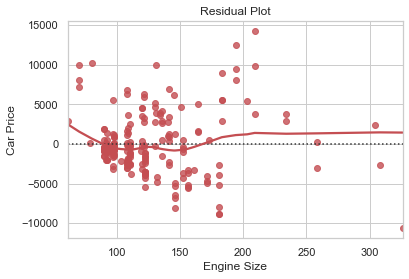

In [25]:
#Residual plot
sns.set(style="whitegrid")
sns.residplot(X, y, lowess=True, color="r")
plt.title('Residual Plot')
plt.ylabel('Car Price')
plt.xlabel('Engine Size')
plt.show()

The $R^2$ value for this plot (0.78) is closer to 1, indicating a linear regression may be a good model for estimating car price given engine size. 